In [ ]:
from tensorflow.examples.tutorials.mnist import *

In [ ]:
import seaborn as sbn
import tensorflow as tf
from functools import partial

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)



train = mnist.train.images
target_train = mnist.train.labels

In [ ]:
##Code d'un réseau de neuronnes avec optimizer Adam, batch normalisation, relu
n_neural_hidden_1 = 300
n_neural_hidden_2 = 200
training = True

def echeancier_apprentissage(initial_learning_rate,decay_steps = 10000,decay_rate = 1/10):

    return(learning_rate)
    

def neural_nets(data,target,batch_size=128,nbr_epoch=30,n_neural_hidden_1 = 300,n_neural_hidden_2 = 100,initial_learning_rate = 0.1,dropout_rate = 0.90,decay_steps = 10000,decay_rate = 1/10,training = True):
    tf.reset_default_graph() 
    my_batch_normalisation_layer = partial(tf.layers.batch_normalization,training = training, momentum = 0.9)
    he_init = tf.contrib.layers.variance_scaling_initializer(mode = 'FAN_AVG')
    keep_prob = tf.constant(dropout_rate)
    
    input_nn = tf.placeholder('float',shape = (None,784))
    target_nn = tf.placeholder('float',shape = (None,10))
    
    hidden_1 = tf.layers.dense(input_nn,n_neural_hidden_1,kernel_initializer = he_init, name = 'hidden1')
#     batch_normed =my_batch_normalisation_layer(hidden_1)
    batch_activated = tf.nn.selu(hidden_1)
    batch_activated = tf.contrib.nn.alpha_dropout(batch_activated,keep_prob)
    hidden_2 = tf.layers.dense(batch_activated,n_neural_hidden_2,kernel_initializer = he_init,name = 'hidden2')
    batch_activated2 = tf.nn.selu(hidden_2)
    batch_activated2 = tf.contrib.nn.alpha_dropout(batch_activated2,keep_prob)
    
    output = tf.layers.dense(batch_activated2,10,name = 'output')
    y_pred = tf.nn.softmax(output,name='softmax_out')
    
    loss = tf.nn.softmax_cross_entropy_with_logits(logits = y_pred,labels = target_nn)
    error = tf.reduce_mean(loss)
    
    global_step = tf.Variable(0, trainable=False)

    learning_rate = tf.train.exponential_decay(initial_learning_rate,global_step,decay_steps,decay_rate)

    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9,use_nesterov=True)
    train_op = optimizer.minimize(error,global_step=global_step)
    
    extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    

    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for epoch in range(nbr_epoch):
            for batch in range(data.shape[0]//batch_size):
                loss = sess.run([error,train_op,extra_update_ops], 
                                feed_dict={input_nn:data[128*batch:128*(batch+1)],
                                           target_nn:target[128*batch:128*(batch+1)]}
                               )[0]
            print('Epoch {}, Loss de ->'.format(epoch),loss)


In [ ]:
neural_nets(train,target_train)

In [ ]:
train.shape[0]

<h3>Data processing</h3>

In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sbn

from functools import partial

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
train = mnist.train.images
target_train = mnist.train.labels

train_util = []
target_train_util = []

for k in range(train.shape[0]):
    if np.sum(target_train[k][0:5]) != 0:
        train_util.append(train[k])
        target_train_util.append(target_train[k][0:5])

train_data = np.array(train_util)[:20000]
target_train = np.array(target_train_util)[:20000]

validation_data = np.array(train_util)[20000:]
target_validation = np.array(target_train_util)[20000:]

In [16]:
train_data.shape

(20000, 784)

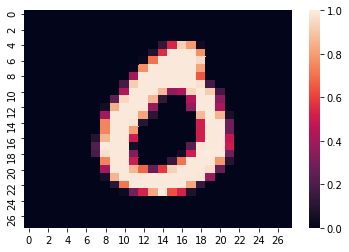

In [24]:
import random as rd

r = rd.randint(0,train_data.shape[0])

sbn.heatmap(train_data[r].reshape((28,28)))

In [81]:
L = [[1,2,3,5,9,4]]
B = [1,1,3,5,9,5]
R = np.append(L,B)
np.sum(B)

24

In [84]:
def preprocess_results(results):
    out = []
    for result in results:
        preprocessed_vector = np.zeros(result.shape)
        index_max = result.argmax()
        preprocessed_vector[index_max] = 1
        out.append(preprocessed_vector)
    return(out)

def validation_step(results,targets):
    results_util = np.array(preprocess_results(results))
    assert results_util.shape == targets.shape
    answer_array = results_util*targets
    good_results = 0
    for answer in answer_array:
        n = np.sum(answer)
        if n:
            good_results +=1
    return(good_results/targets.shape[0])

In [61]:
target_validation.shape

(8038, 5)

In [83]:
validation_step(out,target_validation)

[ 0.  1.  0.  0.  0.]


0.1723065439163971

In [105]:
def neural_nets(data = None, target=None,training = False):
    tf.reset_default_graph() 
    nbr_epoch = 50
    batch_size = 128
    input_nn = tf.placeholder('float',shape=(None,784))
    if training:
        target_nn = tf.placeholder('float',shape = (None,5))
    he_init = tf.contrib.layers.variance_scaling_initializer(mode = 'FAN_AVG')
    with tf.name_scope('layer_1'):
        hidden_1 = tf.layers.dense(input_nn,100,kernel_initializer=he_init,name='first_layer')
        activation_1 = tf.nn.elu(hidden_1, name= 'activation_1')
        normed_1 = tf.layers.batch_normalization(activation_1,name = 'normed_1', training = training)
    with tf.name_scope('layer_2'):
        hidden_2 = tf.layers.dense(normed_1,100,kernel_initializer=he_init,name='second_layer')
        activation_2 = tf.nn.elu(hidden_2, name= 'activation_2')
        normed_2 = tf.layers.batch_normalization(activation_2,name = 'normed_2', training = training)
    with tf.name_scope('layer_3'):
        hidden_3 = tf.layers.dense(normed_2,100,kernel_initializer=he_init,name='third_layer')
        activation_3 = tf.nn.elu(hidden_3, name= 'activation_3')
        normed_3 = tf.layers.batch_normalization(activation_3,name = 'normed_3', training = training)

    with tf.name_scope('layer_4'):
        hidden_4 = tf.layers.dense(normed_3,100,kernel_initializer=he_init,name='fourth_layer')
        activation_4 = tf.nn.elu(hidden_4, name= 'activation_4')
        normed_4 = tf.layers.batch_normalization(activation_4,name = 'normed_4', training = training)
    
    with tf.name_scope('layer_5'):
        hidden_5 = tf.layers.dense(normed_4,100,kernel_initializer=he_init,name='fifth_layer')
        activation_5 = tf.nn.elu(hidden_5, name= 'activation_5')
        normed_5 = tf.layers.batch_normalization(activation_5,name = 'normed_5', training = training)

    with tf.name_scope('output_layer'):
        output = tf.layers.dense(activation_5,5,kernel_initializer=he_init,name='last_hidden')
        logits = tf.nn.softmax(output)

    if training:
        extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.name_scope('loss_calculation'):
            error = tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = target_nn, name = 'error')
            loss = tf.reduce_mean(error,name='loss')

        with tf.name_scope('optimization'):
            optimizer = tf.train.AdamOptimizer()
            train_op = optimizer.minimize(loss)

    init = tf.global_variables_initializer()

    if training:
        with tf.Session() as sess:
            saver = tf.train.Saver()
            sess.run(init)
            best_validation = 0
            index_validation = 0
            for epoch in range(nbr_epoch):
                save_path = saver.save(sess, "/model/model.ckpt")
                for k in range(train_data.shape[0]//batch_size):
                    X_batch = train_data[k*batch_size:(k+1)*batch_size]
                    Y_batch = target_train[k*batch_size:(k+1)*batch_size]
                    sess.run([train_op,extra_update_ops], feed_dict={input_nn:X_batch,target_nn:Y_batch})
                    validation_logits = sess.run([logits], feed_dict={input_nn:validation_data})
                    test_on_validation = validation_step(validation_logits[0],target_validation)
                    index_validation +=1
                    if test_on_validation > best_validation:
                        best_validation = test_on_validation
                        index_validation = 0
                    if index_validation > 1000:
                        print('Training early stopped at epoch-> {} and batch step ->{} as validation step wasn\'t improving. best score on validation --> {}'.format(epoch,k,best_validation))
                        save_path = saver.save(sess, "/model/model_final.ckpt")
                        return()
                print('Validation score for the epoch {} is -> {}'.format(epoch,best_validation))
                if epoch % 5 == 0:
                    print('Model saved after epoch -> {} @ {}'.format(epoch,save_path))
            save_path = saver.save(sess, "/model/model_final.ckpt")
            return('Model end training with best validation score -> {}'.format(best_validation))
    else:
        with tf.Session() as sess:
            sess.run(init)
            result = sess.run([logits], feed_dict = {input_nn:data})
            return(result)
    #Don't forget to put save.saver(path_fichier) dans la session

In [106]:
out = neural_nets(training=True)

Validation score for the epoch 0 is -> 0.9762378701169445
Model saved after epoch -> 0 @ /model/model.ckpt
Validation score for the epoch 1 is -> 0.98283155013685
Validation score for the epoch 2 is -> 0.983578004478726
Validation score for the epoch 3 is -> 0.9849465041054989
Validation score for the epoch 4 is -> 0.9868126399601891
Validation score for the epoch 5 is -> 0.9873102761881065
Model saved after epoch -> 5 @ /model/model.ckpt
Validation score for the epoch 6 is -> 0.9873102761881065
Validation score for the epoch 7 is -> 0.9873102761881065
Validation score for the epoch 8 is -> 0.9879323214730032
Validation score for the epoch 9 is -> 0.9883055486439413
Validation score for the epoch 10 is -> 0.9883055486439413
Model saved after epoch -> 10 @ /model/model.ckpt
Validation score for the epoch 11 is -> 0.9883055486439413
Validation score for the epoch 12 is -> 0.9886787758148793
Validation score for the epoch 13 is -> 0.9886787758148793
Validation score for the epoch 14 is ->

In [95]:
out = neural_nets(test)

"Training early stopped at epoch-> 26 and batch step ->17 as validation step wasn't improving. best score on validation --> 0.9876835033590445"

In [99]:
L = [0.977855187857676,0.9807165961682011,0.9844488678775815,0.9845732769345609,0.9845732769345609,0.9845732769345609,0.9865638218462304,0.9876835033590445,]



In [ ]:
def new_neural_nets():
    graph = tf.get_default_graph()
    new_hidden_1 = graph.get_tensor_by_name()